In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
meta = pd.read_csv("train.csv")

In [3]:
meta.head(5)

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [15]:
meta.describe()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
count,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000
mean,0.027643,0.772599,0.903955,0.861582,0.009988,0.067797,0.129338,0.049637,0.166263,0.172014,0.061239,0.070420,38.039044
std,0.163957,0.419175,0.294668,0.345356,0.099444,0.251409,0.335591,0.217204,0.372335,0.377411,0.239780,0.255866,20.591990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [16]:
print('')
print('== Looking for duplicates ==')
print('')
duplicates = meta[meta.duplicated() == True]
print(len(duplicates))


== Looking for duplicates ==

0


In [17]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             9912 non-null   object
 1   Subject Focus  9912 non-null   int64 
 2   Eyes           9912 non-null   int64 
 3   Face           9912 non-null   int64 
 4   Near           9912 non-null   int64 
 5   Action         9912 non-null   int64 
 6   Accessory      9912 non-null   int64 
 7   Group          9912 non-null   int64 
 8   Collage        9912 non-null   int64 
 9   Human          9912 non-null   int64 
 10  Occlusion      9912 non-null   int64 
 11  Info           9912 non-null   int64 
 12  Blur           9912 non-null   int64 
 13  Pawpularity    9912 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 1.1+ MB


## Data quality

No issues discovered. 

## Correlation methadata vs Pawpularity score

### Pearson with no data preprocessing

In [18]:
corr_pic = meta.corr(method ='pearson')
corr_pic

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
Subject Focus,1.000000,0.076794,0.038252,0.058672,0.014006,0.020619,-0.052150,-0.038534,-0.075295,-0.076851,-0.040498,-0.046407,-0.009853
Eyes,0.076794,1.000000,0.584484,0.133127,-0.020544,0.052480,-0.084975,0.066361,0.036046,0.022143,0.038179,-0.507323,-0.006686
Face,0.038252,0.584484,1.000000,0.139031,-0.012022,0.034788,-0.108022,0.050847,0.024170,0.013389,0.024704,-0.068198,0.008018
Near,0.058672,0.133127,0.139031,1.000000,-0.027312,0.030234,-0.319107,-0.263498,0.065215,-0.009287,-0.146188,-0.017566,0.001001
Action,0.014006,-0.020544,-0.012022,-0.027312,1.000000,0.025377,-0.002432,-0.004270,-0.009429,-0.010832,-0.017191,0.012009,-0.001373
Accessory,0.020619,0.052480,0.034788,0.030234,0.025377,1.000000,-0.057301,0.065860,-0.041745,-0.038912,0.075063,-0.035012,0.013287
Group,-0.052150,-0.084975,-0.108022,-0.319107,-0.002432,-0.057301,1.000000,0.132007,-0.104287,0.003568,0.063311,0.007899,0.016469
Collage,-0.038534,0.066361,0.050847,-0.263498,-0.004270,0.065860,0.132007,1.000000,0.011476,0.054611,0.482141,-0.026591,0.001732
Human,-0.075295,0.036046,0.024170,0.065215,-0.009429,-0.041745,-0.104287,0.011476,1.000000,0.634381,0.018171,-0.015941,0.003983
Occlusion,-0.076851,0.022143,0.013389,-0.009287,-0.010832,-0.038912,0.003568,0.054611,0.634381,1.000000,0.117725,-0.006338,0.001979


<AxesSubplot:>

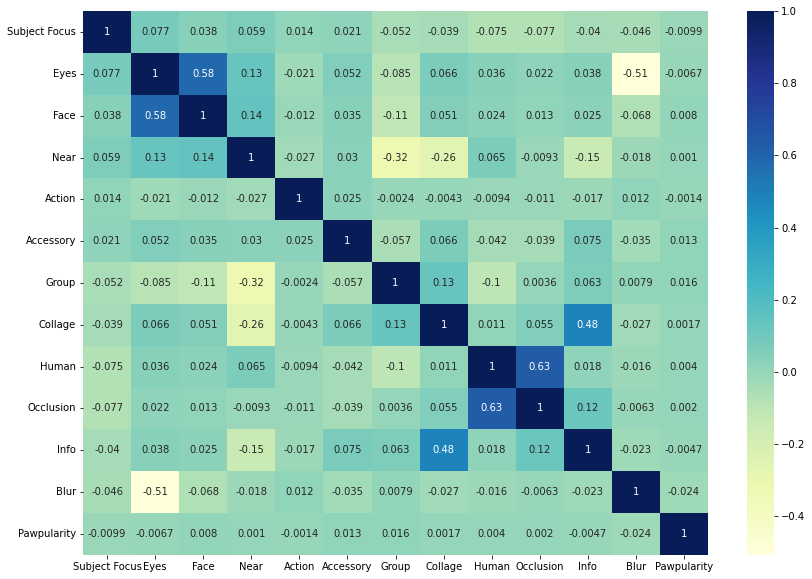

In [19]:
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap(corr_pic, annot=True, ax = ax,cmap="YlGnBu")

### Data preprocessing -> normalize target value

In [20]:
meta_proc = meta.copy(deep=True)

In [24]:
mmscaler = MinMaxScaler()
#cols = ['hsc_p', 'ssc_p', 'age', 'height', 'salary']
meta_proc['Pawpularity'] = mmscaler.fit_transform(meta_proc[['Pawpularity']])

In [25]:
meta_proc

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,0.626263
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,0.414141
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,0.272727
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,0.141414
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,0.717172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,0.141414
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,0.696970
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,0.191919
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,0.191919


<AxesSubplot:>

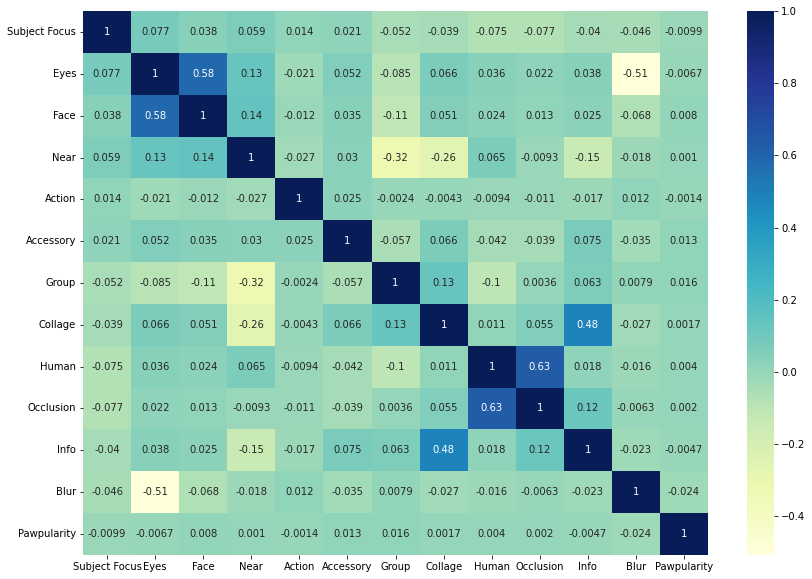

In [26]:
corr_pic_processed = meta_proc.corr(method ='pearson')
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap(corr_pic_processed, annot=True, ax = ax,cmap="YlGnBu")

### Regression analysis

In [37]:
from sklearn.linear_model import LinearRegression
import eli5

In [34]:
features = metha_proc[[col for col in list(meta_proc.columns) if col not in ['Pawpularity','Id']]]

In [35]:
target = meta_proc[['Pawpularity']]

In [36]:
model = LinearRegression()
model.fit(features, target)

LinearRegression()

In [40]:
feature_names = [col for col in list(meta_proc.columns) if col not in ['Pawpularity','Id']]
feature_names

['Subject Focus',
 'Eyes',
 'Face',
 'Near',
 'Action',
 'Accessory',
 'Group',
 'Collage',
 'Human',
 'Occlusion',
 'Info',
 'Blur']

In [43]:
eli5.explain_weights(model,feature_names = feature_names)

Weight?,Feature
+0.367,<BIAS>
+0.025,Face
+0.012,Group
+0.012,Accessory
+0.005,Near
+0.004,Collage
+0.004,Human
-0.001,Occlusion
-0.003,Action
-0.007,Info


## Summary

To discover correlaton between Pawpularity and metadata next approaches have been applied:
1. Pearson coef calculated and plotted on heatmap
2. Target value normalized and pearson coeef calucaled again
3. Regression analysis performed

None of the above stated approaches showed any sign of correlation. 

Assumption: choise of labels (metadata) is not best one.  